# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [1]:
# Step-to-step Data Science project
# Step 1: Problem statement
    # Predict the price of a boat based on its characteristics: year, material, used/new etc.
# Step 2: Company/Field understanding

import pandas as pd

# Step 3: Data collection
table = pd.read_csv("barcos_ref.csv")
display(table)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [2]:
# Step 4: Data cleaning
print(table.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


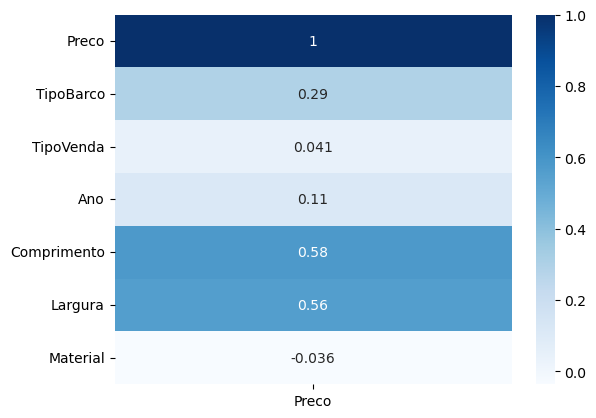

In [7]:
# Step 5: Exploratory data analysis
    # Data correlation
    # Are old boats cheaper?
    # Are bigger boats more expensive?
correlation = table.corr()[["Preco"]]
display(correlation)
# the closer to 1 the greater the correlation
    # length and width have the highest correlation to price
    # ignore the columns that are supposed to be a text (TipoBarco, TipoVenda, Material)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, cmap="Blues", annot=True)
plt.show()

In [9]:
# Step 6: Modeling + Algorithms (IA if necessary)
# Divide the base into x and y
y = table["Preco"] # only the price
x = table.drop("Preco", axis=1) # everything except the price

# Train Test Split
# The AI will take a bigger part of the data to train itself, then use the rest to test what it has learned
# Ex: 70% for training 30% for tests
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)


In [10]:
# Import the AI
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Create the AI
lr_model = LinearRegression()
rfr_model = RandomForestRegressor()

# Train the AI
lr_model.fit(x_train, y_train)
rfr_model.fit(x_train, y_train)

RandomForestRegressor()

In [11]:
# Step 7: Results interpretation
# Choose the best model
from sklearn.metrics import r2_score

lr_prediction = lr_model.predict(x_test)
rfr_prediction = rfr_model.predict(x_test)

print(r2_score(y_test, lr_prediction)) # compares the prediction with the real value
print(r2_score(y_test, rfr_prediction))
# Result: Random Forest Regressor is the best model for our analysis


0.4030482876244872
0.8614103476681068


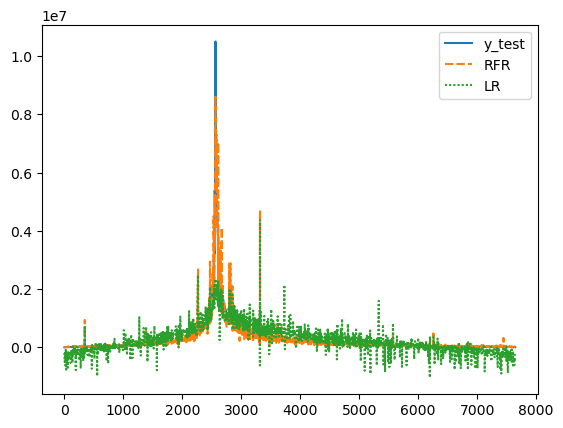

In [12]:
# Visualize predictions
aux_table = pd.DataFrame() # empty table
aux_table["y_test"] = y_test
aux_table["RFR"] = rfr_prediction
aux_table["LR"] = lr_prediction

sns.lineplot(data=aux_table)
plt.show()


In [14]:
# Make new predictions
new_table = pd.read_csv("novos_barcos.csv")
display(new_table)

prediction = rfr_model.predict(new_table)
print(prediction)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 8821.51533333 12548.63       17029.2       ]
